In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path


In [7]:
# Run
#%run -i "main.py"
!python main.py


Using TensorFlow backend.
2020-06-16 12:35:39.535 | DEBUG    | __main__:main:35 - Standard output is sent to added handlers.
2020-06-16 12:35:39.536 | INFO     | __main__:get_config_from_file:186 - Using default config file: config.yml
2020-06-16 12:35:39.536 | INFO     | utils:load_cfg:25 - Loading experiment yaml file
2020-06-16 12:35:39.539 | INFO     | utils:load_cfg:32 - {'experiment_name': 'be_patient', 'n_repeats': 10, 'scenario_params_list': [{'partners_count': [10], 'amounts_per_partner': [[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], 'samples_split_option': [[[1, 'specific'], [1, 'specific'], [1, 'specific'], [1, 'specific'], [1, 'specific'], [1, 'specific'], [1, 'specific'], [1, 'specific'], [1, 'specific'], [1, 'specific']]], 'multi_partner_learning_approach': ['fedavg', 'seq-pure', 'seq-with-final-agg', 'seqavg'], 'aggregation_weighting': ['uniform'], 'epoch_count': [100], 'minibatch_count': [1, 2, 5, 10]}]}
2020-06-16 12:35:39.539 | INFO     | utils:init_result_fol

2020-06-16 12:35:44.687 | INFO     | scenario:__init__:246 - ### Description of data scenario configured:
2020-06-16 12:35:44.687 | INFO     | scenario:__init__:247 -    Number of partners defined: 10
2020-06-16 12:35:44.687 | INFO     | scenario:__init__:248 -    Data distribution scenario chosen: [[1, 'specific'], [1, 'specific'], [1, 'specific'], [1, 'specific'], [1, 'specific'], [1, 'specific'], [1, 'specific'], [1, 'specific'], [1, 'specific'], [1, 'specific']]
2020-06-16 12:35:44.687 | INFO     | scenario:__init__:249 -    Test data distribution scenario chosen: global
2020-06-16 12:35:44.687 | INFO     | scenario:__init__:250 -    Multi-partner learning approach: fedavg
2020-06-16 12:35:44.687 | INFO     | scenario:__init__:251 -    Weighting option: uniform
2020-06-16 12:35:44.688 | INFO     | scenario:__init__:252 -    Iterations parameters: 100 epochs > 1 mini-batches > 8 gradient updates per pass
2020-06-16 12:35:44.688 | INFO     | scenario:__init__:258 - ### Data loaded: m

2020-06-16 12:35:45.769 | DEBUG    | multi_partner_learning:compute_collaborative_round_fedavg:266 - Start new fedavg collaborative round ...
2020-06-16 12:35:45.769 | DEBUG    | multi_partner_learning:compute_collaborative_round_fedavg:275 - (fedavg) Very first minibatch of epoch n°0, init new models for each partner
2020-06-16 12:35:45.773456: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
2020-06-16 12:35:45.790835: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2294605000 Hz
2020-06-16 12:35:45.791560: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x564e939c2140 executing computations on platform Host. Devices:
2020-06-16 12:35:45.791610: I tensorflow/compiler/xla/service/service.cc:175]   StreamExecutor device (0): Host, Default Version
2020-06-16 12:35:45.792080: I tensorflow/stream_executor/cuda/cuda_gpu_executor.c

In [ ]:

root_folder = Path( "experiments")

# Get latest generated folder
subfolder_list = [f for f in root_folder.iterdir()]
subfolder_list_creation_time = [f.stat().st_ctime for f in subfolder_list]
latest_subfolder_idx =  subfolder_list_creation_time.index(max(subfolder_list_creation_time))
experiment_path = subfolder_list[latest_subfolder_idx]

# Read CSV results
df = pd.read_csv(experiment_path / "results.csv")
print(experiment_path.name)

In [125]:
# Config file
with open(experiment_path / "config.yml") as f:
     print(f.read())

experiment_name: cifar
n_repeats: 20
scenario_params_list:
 - dataset_name:
     - 'mnist'
     - 'cifar10'
   partners_count:
     - 3
   amounts_per_partner: 
     - [0.4, 0.3, 0.3]
   samples_split_option: 
     - 'random'
     - 'stratified'
   multi_partner_learning_approach:
     - 'fedavg'
     - 'seq-pure'
     - 'seq-with-final-agg'
     - 'seqavg'
   aggregation_weighting: 
     - 'uniform'
   epoch_count: 
     - 50
   minibatch_count: 
     - 10
   gradient_updates_per_pass_count:
     - 8



In [126]:
experiment_path
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 22 columns):
aggregation_weighting              136 non-null object
amounts_per_partner                136 non-null object
dataset_name                       136 non-null object
epoch_count                        136 non-null float64
final_relative_nb_samples          136 non-null object
gradient_updates_per_pass_count    136 non-null float64
is_early_stopping                  136 non-null float64
learning_computation_time_sec      136 non-null float64
minibatch_count                    136 non-null float64
mpl_nb_epochs_done                 136 non-null float64
mpl_test_score                     136 non-null float64
multi_partner_learning_approach    136 non-null object
nb_samples_used                    136 non-null float64
partners_count                     136 non-null float64
samples_split_option               136 non-null object
scenario_name                      136 non-null object
short_

In [132]:
scenario_ids = df.scenario_id.unique()
random_states = df.random_state.unique()
samples_split_option_list = df.samples_split_option.unique()
amounts_per_partner_list = df.amounts_per_partner.unique()
gradient_updates_per_pass_count_list = df.gradient_updates_per_pass_count.unique()
dataset_name_list = df.dataset_name.unique()

print('Random state', random_states)
print('Scenario id', scenario_ids)
print('amounts_per_partner', amounts_per_partner_list)
print()

df.info()
df.head(5)

Random state [0 1 2 3 4 5 6 7 8]
Scenario id [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
amounts_per_partner ['[0.4, 0.3, 0.3]']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 23 columns):
aggregation_weighting              136 non-null object
amounts_per_partner                136 non-null object
dataset_name                       136 non-null object
epoch_count                        136 non-null float64
final_relative_nb_samples          136 non-null object
gradient_updates_per_pass_count    136 non-null float64
is_early_stopping                  136 non-null float64
learning_computation_time_sec      136 non-null float64
minibatch_count                    136 non-null float64
mpl_nb_epochs_done                 136 non-null float64
mpl_test_score                     136 non-null float64
multi_partner_learning_approach    136 non-null object
nb_samples_used                    136 non-null float64
partners_count                     1

,aggregation_weighting,amounts_per_partner,dataset_name,epoch_count,final_relative_nb_samples,gradient_updates_per_pass_count,is_early_stopping,learning_computation_time_sec,minibatch_count,mpl_nb_epochs_done,...,partners_count,samples_split_option,scenario_name,short_scenario_name,single_partner_test_mode,test_data_samples_count,train_data_samples_count,random_state,scenario_id,computation_time_minutes
0,uniform,"[0.4, 0.3, 0.3]",mnist,50.0,"[0.4, 0.3, 0.3]",8.0,1.0,567.962196,10.0,12.0,...,3.0,random,scenario_1_repeat_1_2020-06-15_11h09_c8f,"random[0.4, 0.3, 0.3] mb 10.0",global,10000.0,48000.0,0,0,9.466037
1,uniform,"[0.4, 0.3, 0.3]",mnist,50.0,"[0.4, 0.3, 0.3]",8.0,1.0,138.282786,10.0,7.0,...,3.0,random,scenario_2_repeat_1_2020-06-15_11h19_6ef,"random[0.4, 0.3, 0.3] mb 10.0",global,10000.0,48000.0,0,1,2.304713
2,uniform,"[0.4, 0.3, 0.3]",mnist,50.0,"[0.4, 0.3, 0.3]",8.0,1.0,142.942296,10.0,7.0,...,3.0,random,scenario_3_repeat_1_2020-06-15_11h21_ec4,"random[0.4, 0.3, 0.3] mb 10.0",global,10000.0,48000.0,0,2,2.382372
3,uniform,"[0.4, 0.3, 0.3]",mnist,50.0,"[0.4, 0.3, 0.3]",8.0,1.0,192.429308,10.0,7.0,...,3.0,random,scenario_4_repeat_1_2020-06-15_11h23_02e,"random[0.4, 0.3, 0.3] mb 10.0",global,10000.0,48000.0,0,3,3.207155
4,uniform,"[0.4, 0.3, 0.3]",mnist,50.0,"[0.4, 0.3, 0.3]",8.0,1.0,516.250722,10.0,11.0,...,3.0,stratified,scenario_5_repeat_1_2020-06-15_11h27_aee,"stratified[0.4, 0.3, 0.3] mb 10.0",global,10000.0,48000.0,0,4,8.604179


In [128]:
df["computation_time_minutes"] = df.learning_computation_time_sec / 60
df.short_scenario_name = df.samples_split_option + df.amounts_per_partner + ' mb ' + df.minibatch_count.astype(str)
df.short_scenario_name.unique()
#df.contributivity_method = df.contributivity_method.str.replace('values', '')

array(['random[0.4, 0.3, 0.3] mb 10.0',
       'stratified[0.4, 0.3, 0.3] mb 10.0'], dtype=object)

In [129]:
# Helper function for plot
def get_x_tick_amount(df, scenario_id, partners_ids):
    
    x_ticks = []
    for partner_id in partners_ids:
        current_df = df[(df.scenario_id == scenario_id) & (df.partner_id == partner_id)]
        amount = current_df.amount_per_partner.unique()

        assert(len(amount) == 1)
        amount = amount[0]
    
        x_ticks.append('partner_' + str(partner_id) + ' ' + str(amount))
    return x_ticks

################################################
mnist


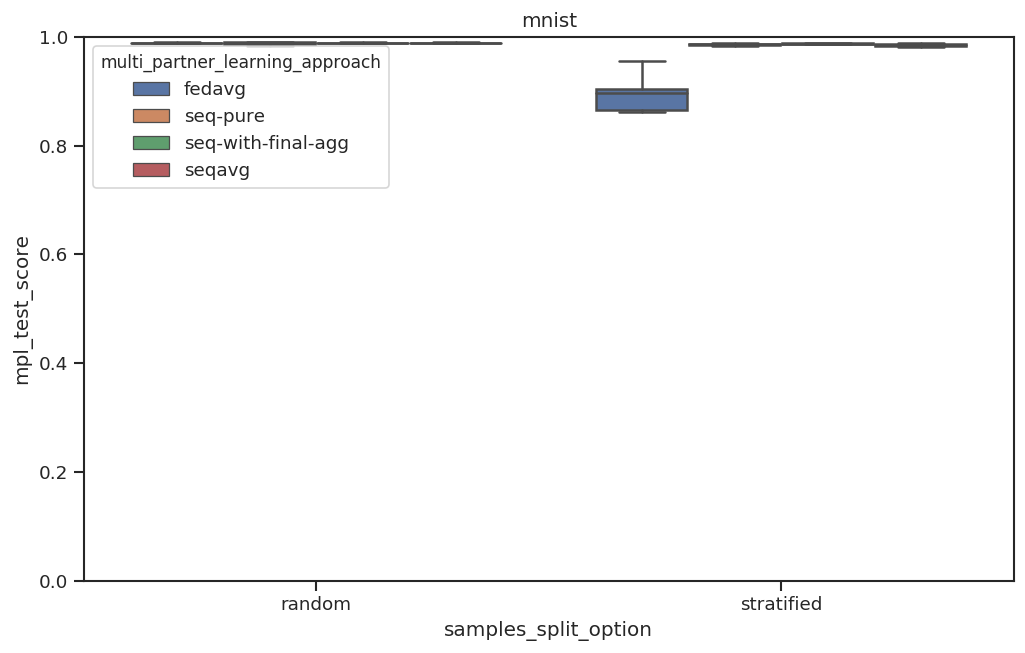

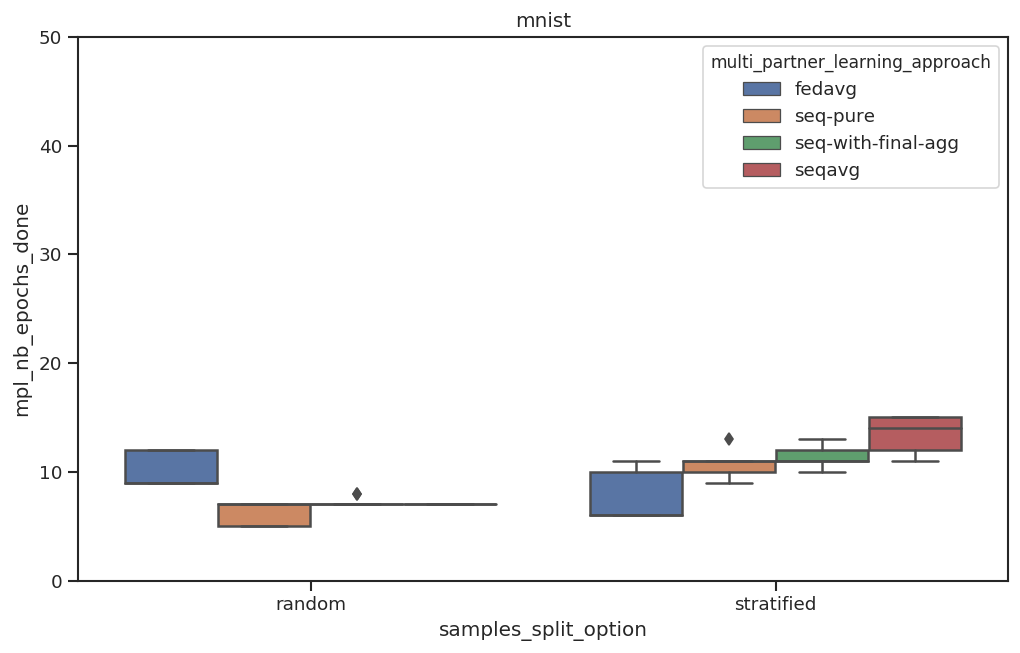

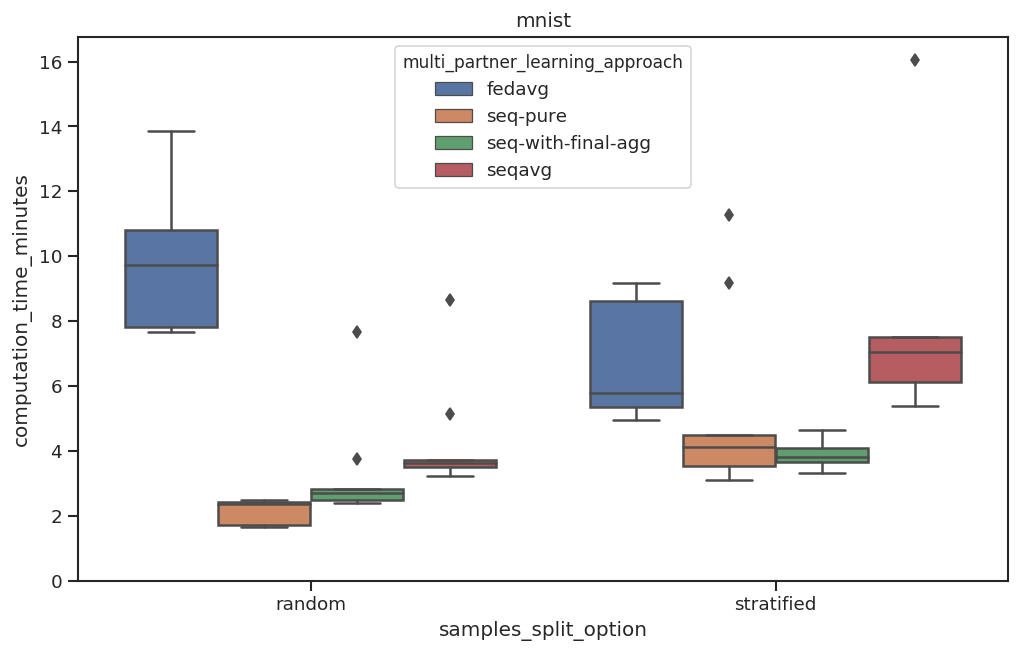

################################################
cifar10


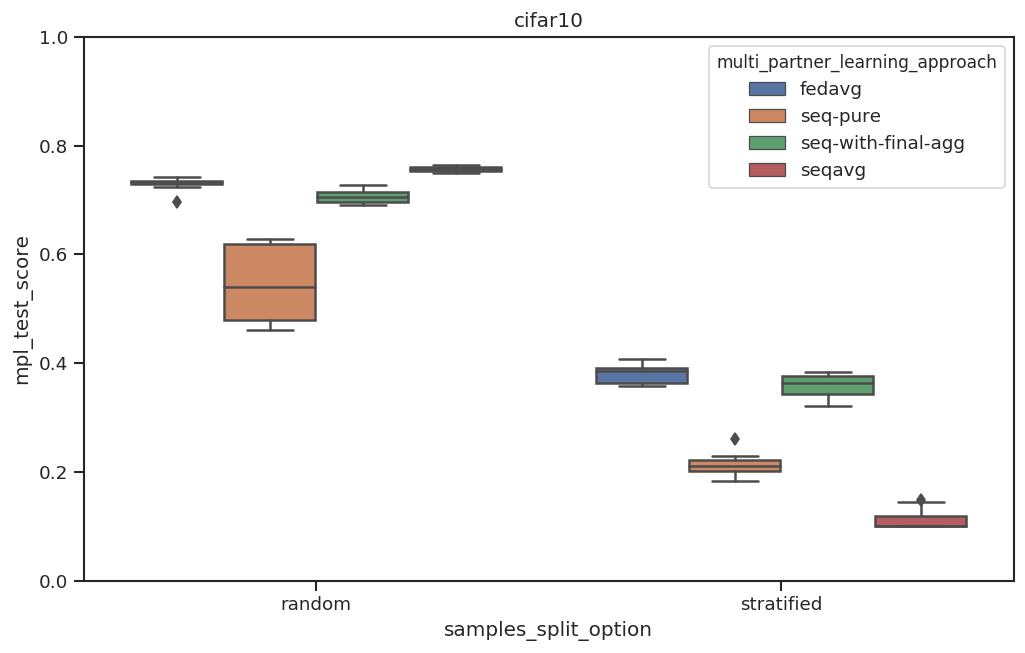

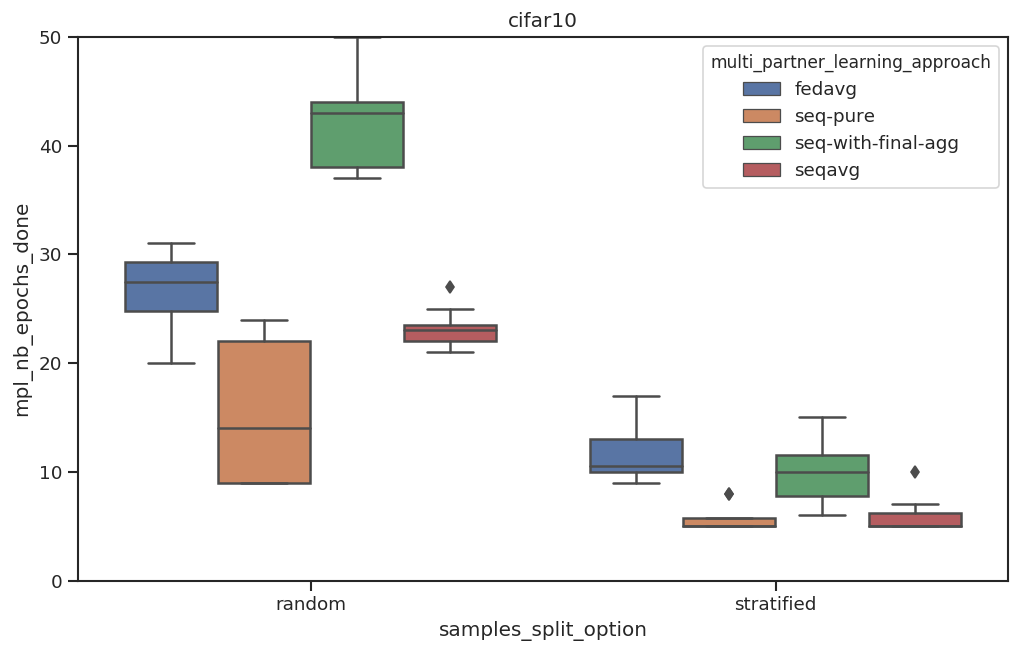

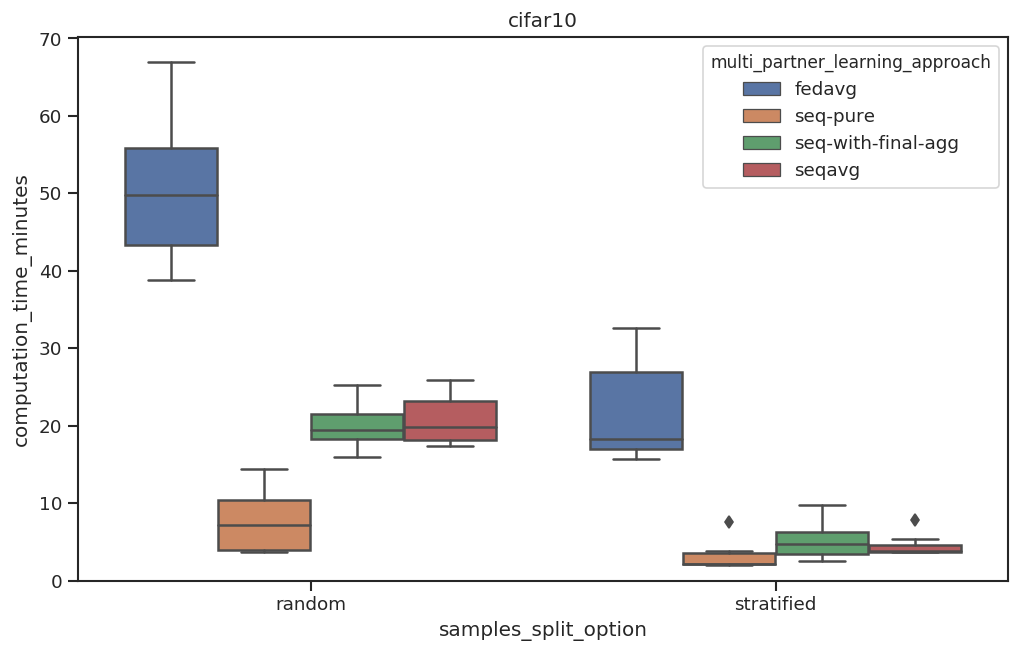

In [139]:
# Plot loop


for dataset_name in dataset_name_list:

    current_df = df[(df.dataset_name == dataset_name)]
    title = dataset_name
    sns.set(style="ticks")
    #current_df.info()
    print("################################################")
    print(dataset_name)

    plt.figure(figsize=(10, 6), dpi=120)
    plt.title(title)
    ax = sns.boxplot(x="samples_split_option", y="mpl_test_score", hue="multi_partner_learning_approach",
                       data=current_df)# medianprops={'color':'yellow'})
    plt.ylim([0, 1])

    plt.figure(figsize=(10, 6), dpi=120)
    plt.title(title)
    ax = sns.boxplot(x="samples_split_option", y="mpl_nb_epochs_done", hue="multi_partner_learning_approach",
                       data=current_df)
    plt.ylim([0, 50])


    ax = plt.figure(figsize=(10, 6), dpi=120)
    plt.title(title)
    sns.boxplot(x="samples_split_option", y="computation_time_minutes", hue="multi_partner_learning_approach",
                      data=current_df)
    plt.ylim(bottom=0)


    plt.show()
